<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/Answer_Script_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 03**

**(a) Data Preparation**
1. Load the dataset and display its shape and basic statistics.
2. Separate features (X) and target (y).
3. Encode target variable using LabelEncoder and to_categorical.
4. Split the dataset into training and testing sets with 75% for training and 25% for testing.
5. Scale numerical features using MinMaxScaler to normalize data for ANN training.

In [1]:
# 1.1 Load dataset
import pandas as pd

df = pd.read_csv("sample_data/winequality-red.csv")

print("Dataset shape:", df.shape)
display(df.head())
print("\nBasic statistics:")
display(df.describe())


Dataset shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Basic statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# 1.2 Separate features and target
X = df.drop("quality", axis=1)  # replace "target" with actual target column name if different
y = df["quality"]

# 1.3 Encode target variable
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Check encoding
print("\nEncoded target (first 5 rows):")
print(y_categorical[:5])


Encoded target (first 5 rows):
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [4]:
# 1.4 Train-test split (75% train, 25% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.25, random_state=42, stratify=y_categorical
)

# 1.5 Scale numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**(b) Model Building and Training**
1. Build a feedforward ANN with the following specifications:
  *   Two hidden layers, each with 10 neurons.
  *   ReLU activation function in both hidden layers.
  *   Sigmoid activation function in the output layer.

2. Compile the model using:
  *   Optimizer: Adam
  *   Loss Function: categorical_crossentropy
  *   Metric: accuracy

In [5]:
# 2.1 Build Feedforward ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(10, activation='relu'),
    Dense(y_categorical.shape[1], activation='sigmoid')  # output neurons = number of classes
])

# 2.2 Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2.3 EarlyStopping: Stop training early if validation loss does not improve for patience=10 epochs.
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 2.4 Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,   # 20% of training data used for validation each epoch.
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4160 - loss: 1.6215 - val_accuracy: 0.3792 - val_loss: 1.5442
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4020 - loss: 1.4985 - val_accuracy: 0.3875 - val_loss: 1.4182
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4145 - loss: 1.3648 - val_accuracy: 0.3708 - val_loss: 1.3092
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4380 - loss: 1.2651 - val_accuracy: 0.4417 - val_loss: 1.2392
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4943 - loss: 1.1980 - val_accuracy: 0.5292 - val_loss: 1.2031
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5167 - loss: 1.1650 - val_accuracy: 0.5292 - val_loss: 1.1890
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4978 - loss: 1.1434 - val_accuracy: 0.5250 - val_loss: 1.1834
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5047 - loss: 1.1146 - val_accuracy: 0.5458 - val_loss: 1.

Visualize training history

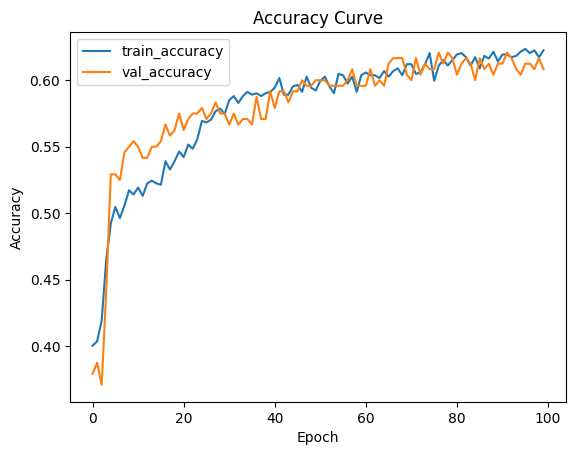

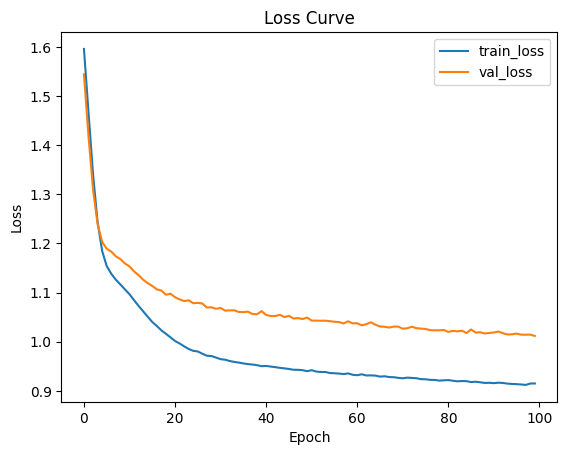

In [6]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**(c) Model Evaluation**
1. Evaluate the trained model using accuracy, precision, recall, and F1-score on the test set.

In [7]:
# Predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = y_pred_probs.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Accuracy: 0.625
Precision: 0.5921296689804977
Recall: 0.625
F1-score: 0.6064659320382407

Confusion Matrix:
 [[  0   0   2   0   0   0]
 [  0   0  10   3   0   0]
 [  0   0 124  44   2   0]
 [  0   0  42 105  13   0]
 [  0   0   2  27  21   0]
 [  0   0   0   2   3   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        13
           2       0.69      0.73      0.71       170
           3       0.58      0.66      0.62       160
           4       0.54      0.42      0.47        50
           5       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.30      0.30      0.30       400
weighted avg       0.59      0.62      0.61       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m